# Chapter 03) 회귀 알고리즘과 모델 규제

- 머신러닝 모델은 주기적으로 훈련해야 합니다.

머신러닝 모델은 한 번 만들고 끝나는 프로그램이 아닙니다. 시간과 환경이 변화하면서 데이터도 바뀌기 때문에 주기적으로 새로운 훈련 데이터로 모델을 다시 훈련해야 합니다. 예를 들어 배달 음식이 도착하는 시간을 예측하는 모델은 배달원이 바뀌거나 도로 환경이 변할 수 있기 때문에 새로운 데이터를 사용해 반복적으로 훈련해야 합니다.

coef_와 intercept_를 머신러닝 알고리즘이 찾은 값이라는 의미로 **모델 파라미터**라고 부릅니다. 이 책에서 사용하는 많은 머신러닝 알고리즘의 훈련 과정은 최적의 모델 파라미터를 찾는 것과 같습니다. 이를 **모델 기반 학습**이라고 부릅니다. \
앞서 사용한 k-최근접 이웃에는 모델 파라미터가 없습니다. 훈련 세트를 저장하는 것이 훈련의 전부였죠. 이를 **사례 기반 학습**이라고 부릅니다.

- 2차 방정식도 선형 회귀인가요?

이 식은 2차 방정식인데 그럼 비선형(non-linear) 아닌가요? 어떻게 이를 선형 회귀라고 부를 수 있을까요? 사실 길이^2을 간단히 다른 변수로 치환할 수 있습니다. 가령 '길이^2=왕길이'로 바꾸면 '무게=1.01*왕길이-21.6*길이+116.05'와 같이 쓸 수 있습니다. 즉 무게는 왕길이와 길이의 선형 관계로 표현할 수 있습니다.

## 03-3. 특성 공학과 규제

- 특성 공학은 주어진 특성을 조합하여 새로운 특성을 만드는 일련의 작업 과정입니다.

In [ ]:
import pandas as pd
df = pd.read_csv('https://bit.ly/perch_csv_data')
perch_full = df.to_numpy()
print(perch_full)

[[ 8.4   2.11  1.41]
 [13.7   3.53  2.  ]
 [15.    3.82  2.43]
 [16.2   4.59  2.63]
 [17.4   4.59  2.94]
 [18.    5.22  3.32]
 [18.7   5.2   3.12]
 [19.    5.64  3.05]
 [19.6   5.14  3.04]
 [20.    5.08  2.77]
 [21.    5.69  3.56]
 [21.    5.92  3.31]
 [21.    5.69  3.67]
 [21.3   6.38  3.53]
 [22.    6.11  3.41]
 [22.    5.64  3.52]
 [22.    6.11  3.52]
 [22.    5.88  3.52]
 [22.    5.52  4.  ]
 [22.5   5.86  3.62]
 [22.5   6.79  3.62]
 [22.7   5.95  3.63]
 [23.    5.22  3.63]
 [23.5   6.28  3.72]
 [24.    7.29  3.72]
 [24.    6.38  3.82]
 [24.6   6.73  4.17]
 [25.    6.44  3.68]
 [25.6   6.56  4.24]
 [26.5   7.17  4.14]
 [27.3   8.32  5.14]
 [27.5   7.17  4.34]
 [27.5   7.05  4.34]
 [27.5   7.28  4.57]
 [28.    7.82  4.2 ]
 [28.7   7.59  4.64]
 [30.    7.62  4.77]
 [32.8  10.03  6.02]
 [34.5  10.26  6.39]
 [35.   11.49  7.8 ]
 [36.5  10.88  6.86]
 [36.   10.61  6.74]
 [37.   10.84  6.26]
 [37.   10.57  6.37]
 [39.   11.14  7.49]
 [39.   11.14  6.  ]
 [39.   12.43  7.35]
 [40.   11.93

In [ ]:
import numpy as np
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0]
)

In [ ]:
# perch_full과 perch_weight를 훈련 세트, 테스트 세트로 나누기
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(perch_full, perch_weight, random_state=42)

### 사이킷런의 변환기

사이킷런의 변환기 PolynomialFeatures 클래스는 주어진 입력 데이터의 다항식(polynomial) 특성을 생성해주는 역할을 합니다. 이 변환기를 사용하면 모델에 다항 특성을 추가할 수 있어 선형 회귀 모델 등에서 비선형 관계를 학습할 수 있게 됩니다.

- degree 매개변수\
다항식의 차수를 설정하는 매개변수입니다. 기본값은 2로, 2차 다항식 특성을 생성합니다. 차수가 높아질수록 더 복잡한 특성이 추가되며, 데이터의 복잡한 관계를 표현할 수 있지만 과적합의 위험도 커질 수 있습니다.

- 상호작용 항(interaction term) 포함 여부\
interaction_only=True 옵션을 주면, 각 특성 간의 곱만 생성하고, 각 특성의 제곱이나 세제곱 같은 항은 제외합니다.

- include_bias 매개변수\
include_bias=True 설정 시, 1로 채워진 편향(bias) 항을 추가합니다. 이 항은 모델이 절편(intercept)을 포함하도록 도와줍니다. 기본값은 True입니다.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures() # PolynomialFeatures 객체 생성
poly.fit([[2, 3]]) # 이 과정에서 fit은 입력 데이터의 특성 개수를 학습
# [[2, 3]]는 두 개의 특성(2와 3)을 가지므로, 변환 후에는 각 특성의 다항식 조합이 포함된 결과가 생성됩니다.
print(poly.transform([[2, 3]]))

[[1. 2. 3. 4. 6. 9.]]


[1,2,3,4,6,9]
변환된 각 항목은 :

1: 편향 항(항상 1로 채워짐, include_bias=True이므로 추가됨)\
2: 첫 번째 특성 값 (𝑥)\
3: 두 번째 특성 값 (𝑦)\
4: 첫 번째 특성의 제곱 (𝑥2)\
6: 첫 번째와 두 번째 특성 간의 곱 (𝑥𝑦)\
9: 두 번째 특성의 제곱 (𝑦2)

1이 추가된 이유?
선형 방정식의 절편을 항상 값이 1인 특성과 곱해지는 계수라고 볼 수 있습니다. 이렇게 놓고 보면 특성은 (길이, 높이, 두께, 1)이 됩니다. 하지만 사이킷런의 선형 모델은 자동으로 절편을 추가하므로 굳이 이렇게 특성을 만들 필요가 없습니다. `include_bias=False`로 지정하여 다시 특성을 변환하겠습니다.\
*사이킷런 모델은 자동으로 특성에 추가된 절편 항을 무시함

In [ ]:
poly = PolynomialFeatures(include_bias=False)
poly.fit([[2, 3]])
print(poly.transform([[2, 3]]))

[[2. 3. 4. 6. 9.]]


In [ ]:
poly = PolynomialFeatures(include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
print(train_poly.shape) # (샘플개수, 다항 변환 후 생성된 특성의 개수)

(42, 9)


In [ ]:
# (구명칭) poly.get_feature_names()
poly.get_feature_names_out()

array(['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2',
       'x2^2'], dtype=object)

In [ ]:
test_poly = poly.transform(test_input)

- 꼭 훈련 세트에 적용했던 변환기로 테스트 세트를 변환해야 하나요?

PolynomialFeatures 클래스는 fit() 메서드에서 만들 특성의 조합을 준비하기만 하고 별도의 통계 값을 구하지 않습니다. 따라서 테스트 세트를 따로 변환해도 됩니다. 하지만 앞장에서 설명했듯이 항상 훈련 세트를 기준으로 테스트 세트를 변환하는 습관을 들이는 것이 좋습니다.

### 다중 회귀 모델 훈련하기

In [ ]:
# 사이킷런의 LinearRegression 클래스를 임포트하고 앞에서 만든 train_poly를 사용해 모델 훈련시키기
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))

0.9903183436982125


In [ ]:
print(lr.score(test_poly, test_target)) # 과소적합 문제없이 good!

0.9714559911594111


In [ ]:
# degree=5 > 특성의 개수 매우 많아짐
poly = PolynomialFeatures(degree=5, include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)
print(train_poly.shape)

(42, 55)


In [ ]:
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))

0.9999999999996433


In [ ]:
print(lr.score(test_poly, test_target)) # 훈련 세트에 과대적합된 결과물

-144.40579436844948


- 샘플 개수보다 특성이 많다면 어떨까요?

여기에서 사용한 훈련 세트의 샘플 개수는 42개 밖에 되지 않습니다. 42개의 샘플을 55개의 특성으로 훈련하면 완벽하게 학습할 수 있는 것이 당연합니다. 예를 들어 42개의 참새를 맞추기 위해 딱 한 번 새총을 쏴야 한다면 참새 떼 중앙을 겨냥하여 가능한 한 맞출 가능성을 높여야 합니다. 하지만 55번이나 쏠 수 있다면 한 번에 하나씩 모든 참새를 맞출 수 있습니다. 이 문제를 하결하려면 다시 특성을 줄여야겠군요.

### 규제
머신러닝 모델이 훈련 세트를 너무 과도하게 학습하지 못하도록 훼방하는 것\
선형 회귀 모델의 경우 특성에 곱해지는 계수(또는 기울기)의 크기를 작게 만드는 일

In [ ]:
# StandardScaler 클래스 변환기 사용
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_poly)
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

### 릿지 회귀
규제가 있는 선형 회귀 모델 중 하나이며 선형 모델의 계수를 작게 만들어 과대적합을 완화시킨다.\
계수를 제곱한 값을 기준으로 규제 적용\
비교적 효과가 좋아 널리 사용하는 규제 방법(일반적으로 라쏘보다 릿지를 조금 더 선호)

In [ ]:
from sklearn.linear_model import Ridge
ridge = Ridge() # 기본적으로 alpha=1.0으로 설정, 커질수록 규제 강도가 세짐 > 과소적합 유도
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))

0.9896101671037343


In [ ]:
print(ridge.score(test_scaled, test_target))

0.9790693977615387


- 사람이 직접 지정해야 하는 매개변수

alpha 값은 릿지 모델이 학습하는 값이 아니라 사전에 우리가 지정해야 하는 값입니다. 이렇게 머신러닝 모델이 학습할 수 없고 사람이 알려줘야 하는 파라미터를 **하이퍼파라미터**라고 부릅니다. 사이킷런과 같은 머신러닝 라이브러리에서 하이퍼파라미터는 클래스와 메서드의 매개변수로 표현됩니다.

In [ ]:
# 적적한 alpha값 찾는 방법 : R2값 그래프 그리기
import matplotlib.pyplot as plt
train_score = []
test_score = []

In [ ]:
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    ridge = Ridge(alpha=alpha)
    ridge.fit(train_scaled, train_target)
    train_score.append(ridge.score(train_scaled, train_target))
    test_score.append(ridge.score(test_scaled, test_target))

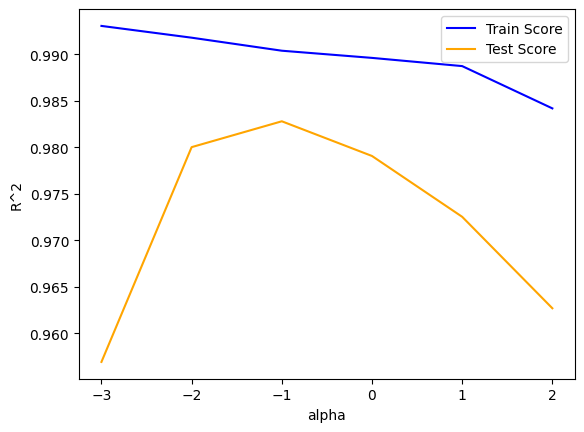

In [ ]:
plt.plot(np.log10(alpha_list), train_score, color='blue', label='Train Score')
plt.plot(np.log10(alpha_list), test_score, color='orange', label='Test Score')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()
plt.show()

In [ ]:
ridge = Ridge(alpha=0.1)
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9903815817570367
0.9827976465386928


### 라쏘 회귀
계수의 절댓값을 기준으로 규제를 적용\
최적의 모델을 찾기 위해 좌표축을 따라 최적화를 수행해가는 좌표 하강법 사용\
릿지와 달리 계수 값을 아예 0으로 만들 수 있음 → 유용한 특성을 골라내는 용도로 사용 가능

In [ ]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))

0.989789897208096


In [ ]:
print(lasso.score(test_scaled, test_target))

0.9800593698421883


In [ ]:
train_score = []
test_score = []
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    lasso = Lasso(alpha=alpha)
    lasso.fit(train_scaled, train_target)
    train_score.append(lasso.score(train_scaled, train_target))
    test_score.append(lasso.score(test_scaled, test_target))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.336e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.025e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.062e+02, tolerance: 5.183e

- 경고가 뜹니다. 정상인가요?

라쏘 모델을 훈련할 때 ConvergenceWarning이란 경고가 발생할 수 있습니다. 사이킷런의 라쏘 모델은 최적의 계수를 찾기 위해 반복적인 계산을 수행하는데, 지정한 반복 횟수가 부족할 때 이런 경고가 발생합니다. 이 반복 횟수를 충분히 늘리기 위해 max_iter 매개변수의 값을 10000으로 지정했습니다. 필요하면 더 늘릴 수 있지만 이 문제에서는 큰 영향을 끼치지 않습니다. → 20000으로 바꾸니까 경고문 하나 줄긴 하네,,

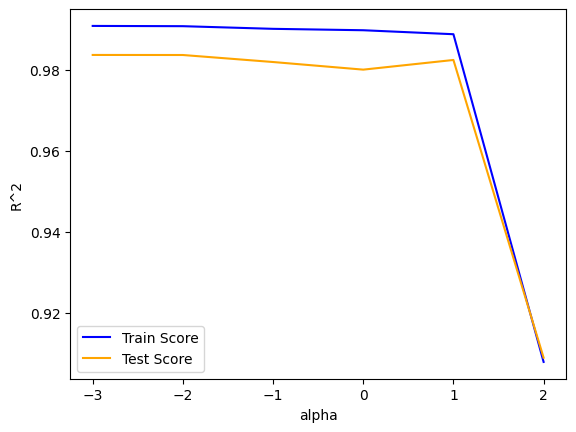

In [ ]:
plt.plot(np.log10(alpha_list), train_score, color='blue', label='Train Score')
plt.plot(np.log10(alpha_list), test_score, color='orange', label='Test Score')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()
plt.show()
# 책이랑 그래프 살짝 다르긴 하당 내 눈엔 -3이나 -2도 괜찮아보임

In [ ]:
lasso = Lasso(alpha=10)
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.9888067471131867
0.9824470598706695


In [ ]:
print(np.sum(lasso.coef_ == 0))

40


In [ ]:
lasso = Lasso(alpha=0.001)
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.990856843502147
0.9836870822242811


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.336e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(


In [ ]:
print(np.sum(lasso.coef_ == 0))

0


In [ ]:
lasso = Lasso(alpha=0.01)
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.9907921500205304
0.9836730006301534


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.025e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(


In [ ]:
print(np.sum(lasso.coef_ == 0))

2


# Chapter 04) 다양한 분류 알고리즘

## 04-1. 로지스틱 회귀

In [ ]:
import pandas as pd
fish = pd.read_csv('https://bit.ly/fish_csv_data')
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


데이터프레임은 통계와 그래프를 위한 메서드를 풍부하게 제공\
넘파이로 상호 변환이 쉽고 사이킷런과도 잘 호환됨

In [ ]:
print(pd.unique(fish['Species'])) # 알파벳순 아님

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


In [ ]:
fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()
fish_target = fish['Species'].to_numpy()

In [ ]:
# 훈련 세트 / 테스트 세트
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

### k-최근접 이웃 분류기의 확률 예측

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier(n_neighbors=3)
kn.fit(train_scaled, train_target)
print(kn.score(train_scaled, train_target))
print(kn.score(test_scaled, test_target))

0.8907563025210085
0.85


타깃 데이터에 2개 이상의 클래스가 포함된 문제를 다중 분류라고 함\
다중 분류에서도 타깃값을 숫자로 바꾸어 입력할 수 있지만 사이킷런에서는 편리하게도 문자열로 된 타깃값을 그대로 사용할 수 있음\
주의할 점? 타깃값을 그대로 사이킷런 모델에 전달하면 자동으로 알파벳 순으로 매겨짐

In [ ]:
print(kn.classes_) # 알파벳순

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [ ]:
print(kn.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Perch' 'Perch']


샘플에 대한 예측은 어떤 확률로 만들어졌을까?\
사이킷런의 분류 모델은 `predict_proba()` 메서드로 클래스별 확률값을 반환한다. \
테스트 세트에 있는 처음 5개의 샘플에 대한 확률을 출력해보자.

In [ ]:
import numpy as np
proba = kn.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=4)) # decimals : 유지할 소수점 아래 자릿수 지정

[[0.     0.     1.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     1.     0.    ]
 [0.     0.     0.     1.     0.     0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]]


[0.     0.     1.     0.     0.     0.     0.    ]\
['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']\
ㄴ각 클래스에 대한 확률

In [ ]:
distances, indexes = kn.kneighbors(test_scaled[3:4]) # kneighbors()의 입력은 2차원 배열이어야 함 → 넘파이 배열의 슬라이싱 연산자 사용
print(train_target[indexes])

[['Roach' 'Perch' 'Perch']]


### 로지스틱 회귀
이름은 회귀지만 분류 모델임!

`z = a*(Weight) + b*(Length) + c*(Diagonal) + d*(Height) + e*(Width) + f`\
a, b, c, d, e는 가중치 혹은 계수\
z는 어떤 값도 가능 (확률이 되려면 0~1 사이 값) → **시그모이드 함수**를 사용하여 z가 아주 큰 음수일 때 0, 아주 큰 양수일 때 1이 되도록 바꾸기

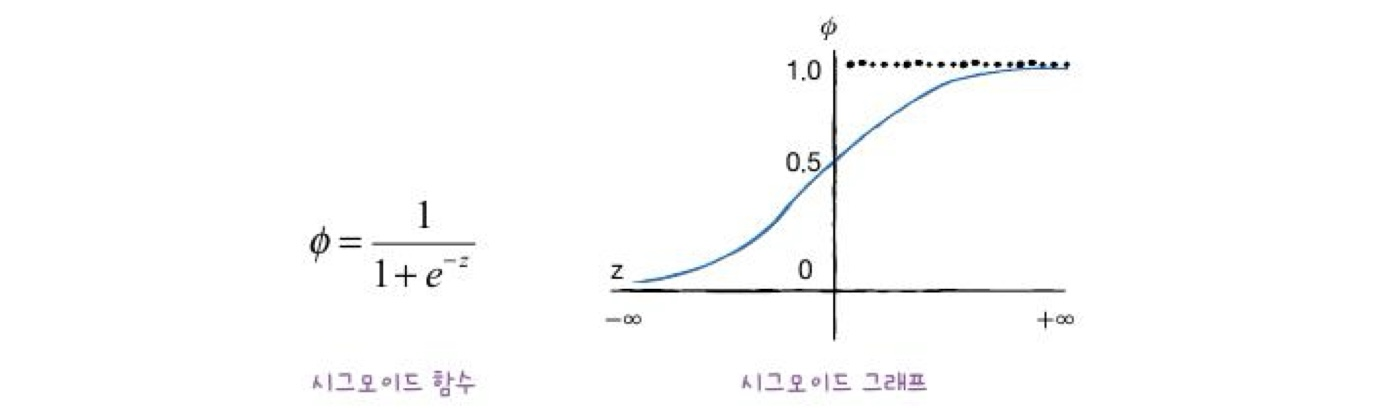

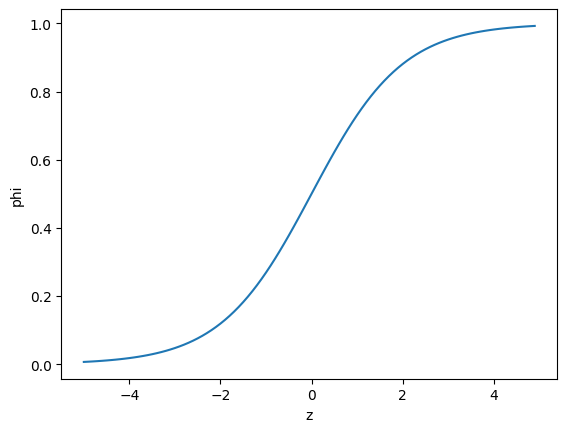

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
z = np.arange(-5, 5, 0.1)
phi = 1 / (1+np.exp(-z))
plt.plot(z, phi)
plt.xlabel('z')
plt.ylabel('phi')
plt.show()

### 로지스틱 회귀로 이진 분류 수행하기

**불리언 인덱싱**을 통해 조건에 맞는 데이터만 필터링할 수 있습니다. 즉, 특정 조건을 만족하는 요소들에 대해 **True 또는 False 값**을 가진 불리언 배열을 생성하고, 이 배열을 인덱스로 사용해 원하는 데이터를 추출하는 방법입니다.

In [ ]:
char_arr = np.array(['A', 'B', 'C', 'D', 'E'])
print(char_arr[[True, False, True, False, False]]) # 'A'랑 'C'만 골라내기 위해 첫번째, 세번째 원소만 True

['A' 'C']


In [ ]:
bream_smelt_indexes = (train_target == 'Bream') | (train_target == 'Smelt')
train_bream_smelt = train_scaled[bream_smelt_indexes]
target_bream_smelt = train_target[bream_smelt_indexes]

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_bream_smelt, target_bream_smelt)

LogisticRegression()

In [ ]:
print(lr.predict(train_bream_smelt[:5]))

['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']


In [ ]:
print(lr.predict_proba(train_bream_smelt[:5])) # 도미는 0, 빙어는 1 이런 게 아니고 각 클래스에 대한 확률 각각 출력 (??)

[[0.99760007 0.00239993]
 [0.02737325 0.97262675]
 [0.99486386 0.00513614]
 [0.98585047 0.01414953]
 [0.99767419 0.00232581]]


In [ ]:
print(lr.classes_) # 알파벳순 정렬 사용됨 -> 빙어(Smelt)가 양성 클래스

['Bream' 'Smelt']


In [ ]:
print(lr.coef_, lr.intercept_)

[[-0.40451732 -0.57582787 -0.66248158 -1.01329614 -0.73123131]] [-2.16172774]


[[-0.40451732 -0.57582787 -0.66248158 -1.01329614 -0.73123131]] [-2.16172774]\
z = a*(Weight) + b*(Length) + c*(Diagonal) + d*(Height) + e*(Width) + f

=> z = -0.404*(weight) -0.576*(length) -0.663*(Diagonal) -1.013*(Height) -0.732*(Width) -2.161\
선형 회귀와 비슷

In [ ]:
# LogisticRegression클래스 z값 출력 -> 이 z값을 시그모이드 함수에 통과시키면 확률을 얻을 수 있음
decisions = lr.decision_function(train_bream_smelt[:5])
print(decisions)

[-6.02991358  3.57043428 -5.26630496 -4.24382314 -6.06135688]


In [ ]:
from scipy.special import expit
print(expit(decisions)) # predict_proba() 출력값과 동일

[0.00239993 0.97262675 0.00513614 0.01414953 0.00232581]


### 로지스틱 회귀로 다중 분류 수행하기
LogisticRegression 클래스는 반복적인 알고리즘 사용\
LogisticRegression은 기본적으로 릿지 회귀와 같이 계수의 제곱을 규제 = L2규제


In [ ]:
lr = LogisticRegression(C=20, max_iter=1000)
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.9327731092436975
0.925


In [ ]:
print(lr.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Roach' 'Perch']


In [ ]:
proba = lr.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=3)) # 7개 생선에 대한 확률 계산(이진일 때는 2개의 열만 있음)

[[0.    0.014 0.842 0.    0.135 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.934 0.015 0.016 0.   ]
 [0.011 0.034 0.305 0.006 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


In [ ]:
print(lr.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [ ]:
print(lr.coef_.shape, lr.intercept_.shape)

(7, 5) (7,)


- 소프트맥스 함수는 뭔가요?

시그모이드 함수는 하나의 선형 방정식의 출력값을 0 ~ 1 사이로 압축합니다. 이와 달리 소프트맥스 함수는 여러 개의 선형 방정식의 출력값을 0~1 사이로 압축하고 전체 합이 1이 되도록 만듭니다. 이를 위해 지수 함수를 사용하기 때문에 **정규화된 지수 함수**라고도 부릅니다.
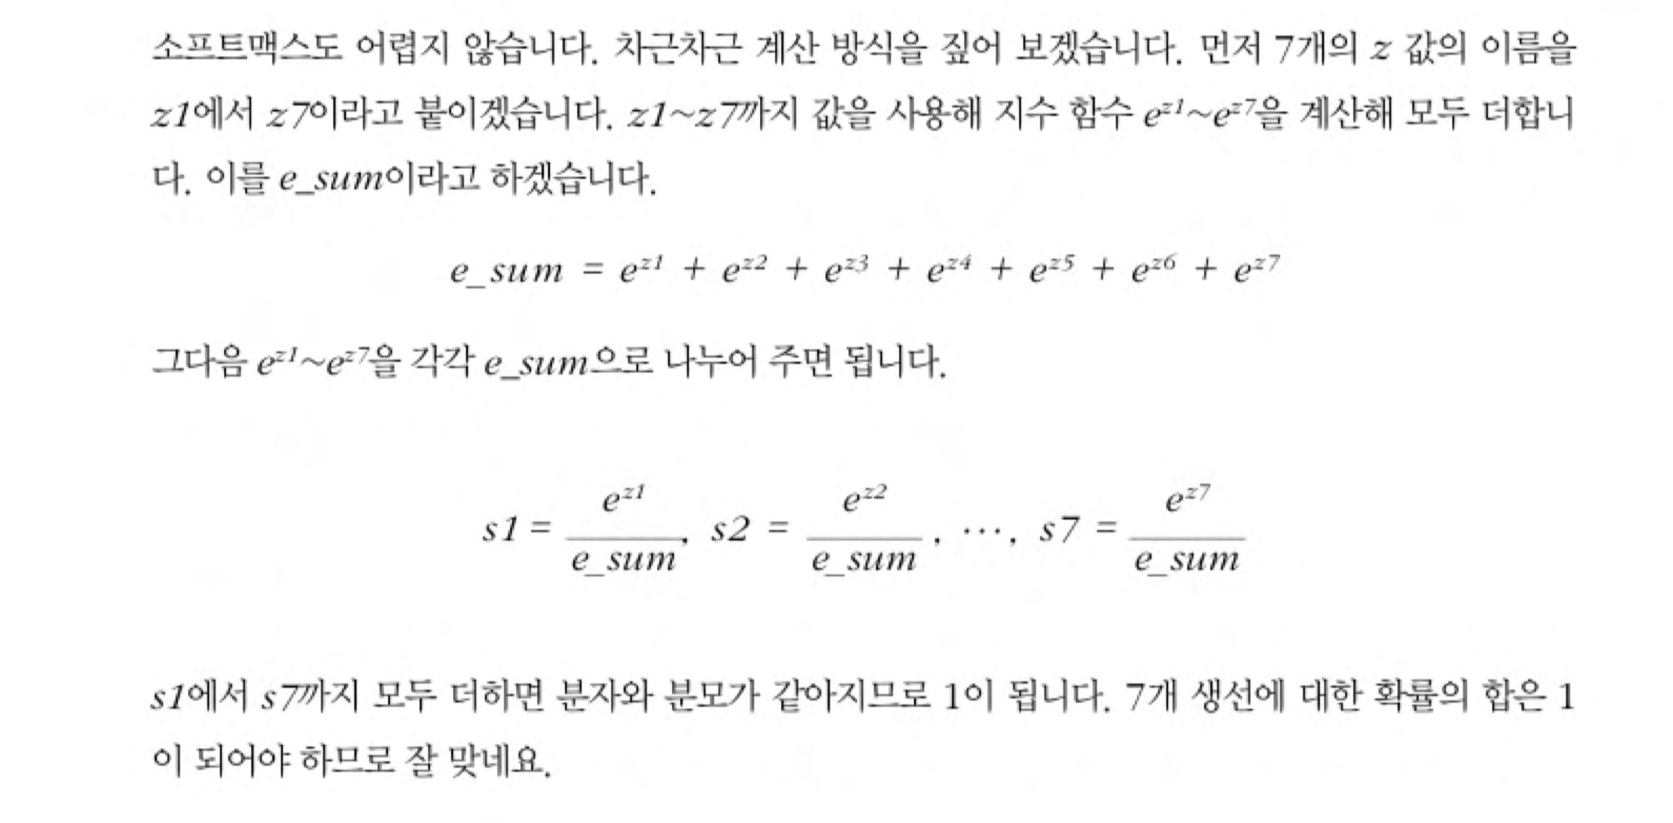

In [ ]:
decision = lr.decision_function(test_scaled[:5])
print(np.round(decision, decimals=2)) # -> 이 값이 z

[[ -6.51   1.04   5.17  -2.76   3.34   0.35  -0.63]
 [-10.88   1.94   4.78  -2.42   2.99   7.84  -4.25]
 [ -4.34  -6.24   3.17   6.48   2.36   2.43  -3.87]
 [ -0.69   0.45   2.64  -1.21   3.26  -5.7    1.26]
 [ -6.4   -1.99   5.82  -0.13   3.5   -0.09  -0.7 ]]


decision?\
decision 배열은 **모델이 각 샘플에 대해 계산한 결정 점수(decision score)**를 의미합니다. 이 결정 점수는 모델이 특정 샘플이 각 클래스에 속할 가능성을 정량적으로 나타낸 값입니다.
결정 점수는 각 클래스에 대한 상대적인 지표일 뿐이므로, softmax를 적용해 확률을 얻기 전까지는 절대적인 확률을 의미하지 않습니다.

In [ ]:
from scipy.special import softmax
proba = softmax(decision, axis=1)
print(np.round(proba, decimals=3))

[[0.    0.014 0.842 0.    0.135 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.934 0.015 0.016 0.   ]
 [0.011 0.034 0.305 0.006 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]
